# Exercise 3.9

This question involves the use of multiple linear regression on the `Auto` data set.
1.  Produce a scatterplot matrix which includes all of the variables in the data set.
2.  Compute the matrix of correlations between the variables using the `DataFrame.corr()` method.
3.  Use the `sm.OLS()` function to perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Use the `summarize()` function to print the results. Comment on the output. For instance:
    1. Is there a relationship between the predictors and the re- sponse? Use the `anova_lm()` function from `statsmodels` to answer this question.
    2. Which predictors appear to have a statistically significant relationship to the response?
    3. What does the coefficient for the year variable suggest?
4. Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?
5. Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?
6. Try a few different transformations of the variables, such as $log(X)$, $\sqrt{X}$, $X^2$. Comment on your findings.

---

In [17]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

This question involves the use of multiple linear regression on the `Auto` data set.

In [3]:
Auto = load_data('Auto')
Auto[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


## Part A
Produce a scatterplot matrix which includes all of the variables in the data set.

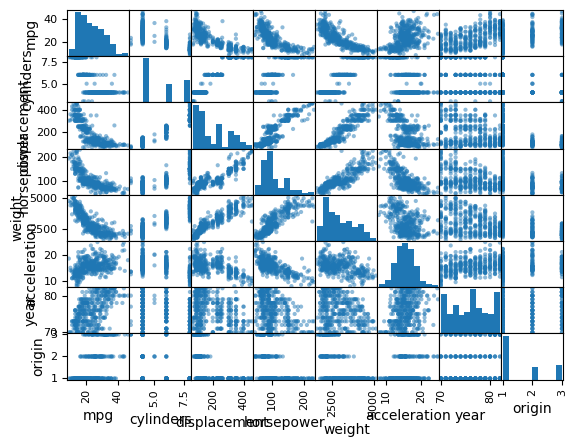

In [6]:
pd.plotting.scatter_matrix(Auto);

## Part B
Compute the matrix of correlations between the variables using the `DataFrame.corr()` method.

In [7]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


## Part C

Use the `sm.OLS()` function to perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Use the `summarize()` function to print the results.

In [22]:
minus_mpg = Auto.columns.drop(['mpg'])

X = MS(minus_mpg).fit_transform(Auto)
y = Auto['mpg']

model = sm.OLS(y, X)
results = model.fit()

summarize(results)


,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


### part i

Is there a relationship between the predictors and the response? Use the `anova_lm()` function from `statsmodels` to answer this question.

In [34]:
result1 = ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', data=Auto).fit()
anova_results = anova_lm(result1)

print(anova_results)
print(result1.summary())

                 df        sum_sq       mean_sq            F         PR(>F)
cylinders       1.0  14403.083079  14403.083079  1300.683788  2.319511e-125
displacement    1.0   1073.344025   1073.344025    96.929329   1.530906e-20
horsepower      1.0    403.408069    403.408069    36.430140   3.731128e-09
weight          1.0    975.724953    975.724953    88.113748   5.544461e-19
acceleration    1.0      0.966071      0.966071     0.087242   7.678728e-01
year            1.0   2419.120249   2419.120249   218.460900   1.875281e-39
origin          1.0    291.134494    291.134494    26.291171   4.665681e-07
Residual      384.0   4252.212530     11.073470          NaN            NaN
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4


Yes. In order to determine if there is a relationship between the predictors and the response in a multiple linear regression, we need to calculate the f-statistic and verify it is significantly larger than 1. Since the f-statistic shown in the `result1.summary()` output is $252.4$ which is sufficiently larger than $1$, we can determine that there is a relationship between the predictors and the response.

### part ii

Which predictors appear to have a statistically significant relationship to the response?

`displacement`, `weight`, `year`, `origin` -- we know this based on the p-values ($P>|t|$) which are all *statistically significant at the 1% level*.

### part iii

What does the coefficient for the year variable suggest?


It suggests that holding all other predictors constant, every year the mpg increases by $0.75$. 

## Part D

Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

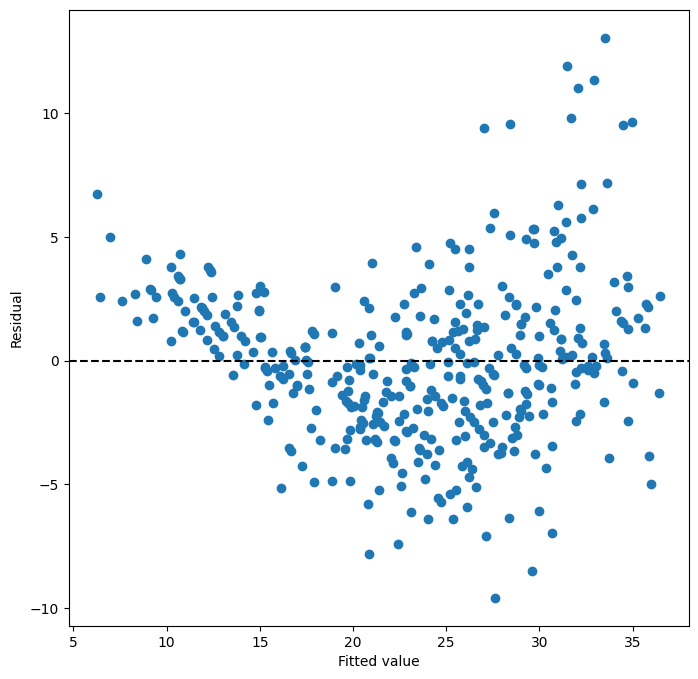

In [35]:
# create plot and axes
ax = subplots(figsize=(8, 8))[1]
ax.set_title('Residuals vs. Fitted values')
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')

# plot residuals vs. fitted values
ax.scatter(results.fittedvalues, results.resid)
ax.axhline(0, c='k', ls='--');

There appears to be a slight funnelling on the values as the magnitude of the residuals increases as the fitted values increase. This indicates heterosceditity, meaning there is a lack of constant variance. Since this pattern is appearing, it suggests that the true relationship may be non-linear. 

13

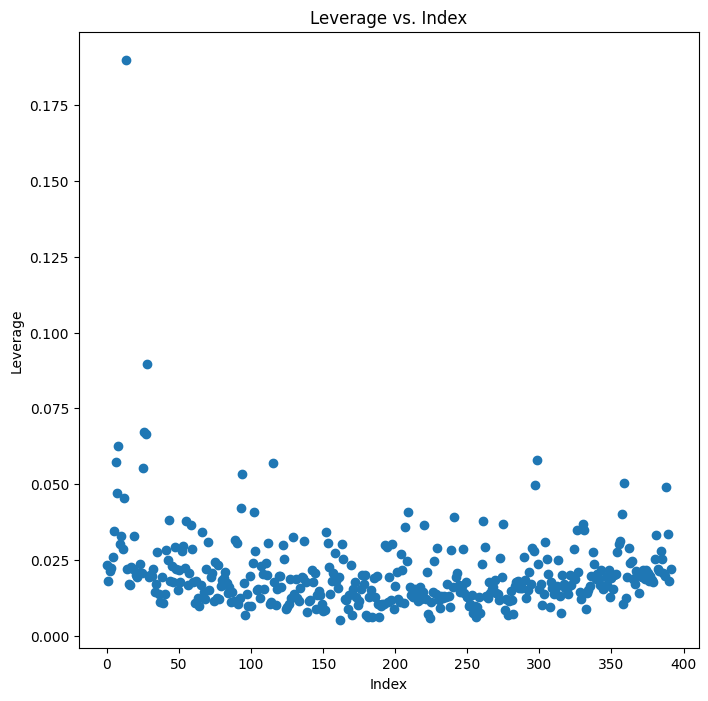

In [36]:
ax = subplots(figsize=(8, 8))[1]
ax.set_title('Leverage vs. Index')
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')

# get leverage for points
infl = results.get_influence()
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
np.argmax(infl.hat_matrix_diag)

Here we can identify point 13 as having the highest leverage. However, this alone doesn't mean that the point is an outlier. Let's see if it is...

In [44]:
residuals = infl.resid_studentized_internal
max_residual_index = np.where(np.abs(residuals) > 3)[0]

max_residual_index

array([242, 320, 323, 324])

Ok, so the high leverage point isn't an outlier, which is a good sign. However, it looks like we have four points where the studentized residual is greater than 3. This indicates that the points at these indices are likely outliers. 

## Part E

Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

In [45]:
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [51]:
results2 = ols(
    'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin \
    + cylinders:displacement + cylinders:horsepower + cylinders:weight + cylinders:acceleration \
    + cylinders:year + cylinders:origin + displacement:horsepower + displacement:weight \
    + displacement:acceleration + displacement:year + displacement:origin + horsepower:weight \
    + horsepower:acceleration + horsepower:year + horsepower:origin + weight:acceleration \
    + weight:year + weight:origin + acceleration:year + acceleration:origin + year:origin', 
    data=Auto
).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          4.01e-155
Time:                        18:22:27   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    35.4789     53.136      0.668      0.505     -69.014     139.972
cylinders                     6.9886      8.248      0.847      0.397      -9.231      23.208
displacement                 -0.4785      0.189     -2.527      0.012      -0.851      -0.106
horsepower                    0.5034      0.347      1.451      0.148      -0.179       1.186
weight                        0.0041      0.018      0.235      0.814      -0.030       0.039
acceleration                 -5.8592      2.174     -2.696      0.007     -10.134      -1.585
year                          0.6974      0.610      1.144      0.253      -0.501       1.896
origin                      -20.8956      7.097     -2.944      0.003     -34.852      -6.939
cylinders:displacement       -0.0034      0.006     -0.524      0.601      -0.016       0.009
cylinders:horsepower          0.0116      0.024      0.480      0.632      -0.036       0.059
cylinders:weight              0.0004      0.001      0.399      0.690      -0.001       0.002
cylinders:acceleration        0.2779      0.166      1.670      0.096      -0.049       0.605
cylinders:year               -0.1741      0.097     -1.793      0.074      -0.365       0.017
cylinders:origin              0.4022      0.493      0.816      0.415      -0.567       1.371
displacement:horsepower   -8.491e-05      0.000     -0.294      0.769      -0.001       0.000
displacement:weight        2.472e-05   1.47e-05      1.682      0.093   -4.18e-06    5.36e-05
displacement:acceleration    -0.0035      0.003     -1.041      0.299      -0.010       0.003
displacement:year             0.0059      0.002      2.482      0.014       0.001       0.011
displacement:origin           0.0240      0.019      1.232      0.219      -0.014       0.062
horsepower:weight         -1.968e-05   2.92e-05     -0.673      0.501   -7.72e-05    3.78e-05
horsepower:acceleration      -0.0072      0.004     -1.939      0.053      -0.015       0.000
horsepower:year              -0.0058      0.004     -1.482      0.139      -0.014       0.002
horsepower:origin             0.0022      0.029      0.076      0.939      -0.055       0.060
weight:acceleration           0.0002      0.000      1.025      0.306      -0.000       0.001
weight:year                  -0.0002      0.000     -1.056      0.292      -0.001       0.000
weight:origin                -0.0006      0.002     -0.364      0.716      -0.004       0.003
acceleration:year             0.0556      0.026      2.174      0.030       0.005       0.106
acceleration:origin           0.4583      0.157      2.926      0.004       0.150       0.766
year:origin                   0.1393      0.074      1.882      0.061      -0.006       0.285
===========================================================================

The following interactions appear to be statistically significant based on their p-values:
- displacement & weight
- horsepower & weight

## Part F

Try a few different transformations of the variables, such as $log(X)$, $\sqrt{X}$, $X^2$. Comment on your findings.

In [52]:
model_log = ols('mpg ~ displacement + np.log(weight)', data=Auto).fit()
summarize(model_log)

,coef,std err,t,P>|t|
Intercept,174.6280,14.216,12.284,0.000
displacement,-0.0140,0.005,-2.735,0.007
np.log(weight),-18.6536,1.900,-9.818,0.000


In [53]:
model_log = ols('mpg ~ displacement + np.sqrt(weight)', data=Auto).fit()
summarize(model_log)

,coef,std err,t,P>|t|
Intercept,63.0100,3.087,20.413,0.000
displacement,-0.0136,0.005,-2.478,0.014
np.sqrt(weight),-0.6834,0.075,-9.132,0.000


In [54]:
model_log = ols('mpg ~ displacement + np.power(weight, 2)', data=Auto).fit()
summarize(model_log)

,coef,std err,t,P>|t|
Intercept,3.520520e+01,4.770000e-01,73.773,0.0
displacement,-3.040000e-02,6.000000e-03,-5.206,0.0
"np.power(weight, 2)",-6.112000e-07,1.110000e-07,-5.485,0.0


weight seems to be statistically significant for 1% in all three transformations.